# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

# Based on this Stack Overflow article, I had to adjust the starter code. It kept saying everything was outside of index otherwise.
# https://stackoverflow.com/questions/68474856/making-a-list-of-coordinates-from-2-seperate-lists-that-display-latitude-and-lon
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 567


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

# Retrieve latitude and longitude from lat_lngs list
    city_lat, city_lng = lat_lngs[i]

    # Create endpoint URL with each city's latitude and longitude
    city_url = f"https://api.openweathermap.org/data/2.5/weather?lat={city_lat}&lon={city_lng}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
City not found. Skipping...
Processing Record 2 of Set 1 | whitehorse
City not found. Skipping...
Processing Record 3 of Set 1 | farasan
Processing Record 4 of Set 1 | adamstown
City not found. Skipping...
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | anadyr
City not found. Skipping...
Processing Record 7 of Set 1 | uturoa
City not found. Skipping...
Processing Record 8 of Set 1 | port alfred
City not found. Skipping...
Processing Record 9 of Set 1 | fale old settlement
City not found. Skipping...
Processing Record 10 of Set 1 | antsiranana
City not found. Skipping...
Processing Record 11 of Set 1 | moree
Processing Record 12 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 13 of Set 1 | blackmans bay
City not found. Skipping...
Processing Record 14 of Set 1 | key largo
City not found. Skipping...
Processing Record 15

City not found. Skipping...
Processing Record 32 of Set 3 | mil'kovo
City not found. Skipping...
Processing Record 33 of Set 3 | shamakhi
City not found. Skipping...
Processing Record 34 of Set 3 | masinigudi
City not found. Skipping...
Processing Record 35 of Set 3 | fort bragg
Processing Record 36 of Set 3 | saldanha
City not found. Skipping...
Processing Record 37 of Set 3 | hadibu
City not found. Skipping...
Processing Record 38 of Set 3 | kuanda
City not found. Skipping...
Processing Record 39 of Set 3 | sittwe
City not found. Skipping...
Processing Record 40 of Set 3 | lazaro cardenas
Processing Record 41 of Set 3 | st. john's
City not found. Skipping...
Processing Record 42 of Set 3 | bilibino
City not found. Skipping...
Processing Record 43 of Set 3 | namibe
City not found. Skipping...
Processing Record 44 of Set 3 | tazovsky
Processing Record 45 of Set 3 | colac
Processing Record 46 of Set 3 | raudales malpaso
City not found. Skipping...
Processing Record 47 of Set 3 | belyy y

City not found. Skipping...
Processing Record 16 of Set 6 | wiecbork
City not found. Skipping...
Processing Record 17 of Set 6 | muisne
City not found. Skipping...
Processing Record 18 of Set 6 | port hedland
Processing Record 19 of Set 6 | byron bay
City not found. Skipping...
Processing Record 20 of Set 6 | kununurra
City not found. Skipping...
Processing Record 21 of Set 6 | richards bay
Processing Record 22 of Set 6 | hammerfest
Processing Record 23 of Set 6 | taroa
City not found. Skipping...
Processing Record 24 of Set 6 | veraval
City not found. Skipping...
Processing Record 25 of Set 6 | cide
Processing Record 26 of Set 6 | bakchar
City not found. Skipping...
Processing Record 27 of Set 6 | vernon
City not found. Skipping...
Processing Record 28 of Set 6 | tura
Processing Record 29 of Set 6 | ishigaki
City not found. Skipping...
Processing Record 30 of Set 6 | nizhneangarsk
City not found. Skipping...
Processing Record 31 of Set 6 | port said
City not found. Skipping...
Process

Processing Record 46 of Set 8 | pachino
City not found. Skipping...
Processing Record 47 of Set 8 | ketchikan
City not found. Skipping...
Processing Record 48 of Set 8 | nieuw amsterdam
City not found. Skipping...
Processing Record 49 of Set 8 | beacon square
Processing Record 0 of Set 9 | konarka
City not found. Skipping...
Processing Record 1 of Set 9 | ayod
City not found. Skipping...
Processing Record 2 of Set 9 | alaghsas
City not found. Skipping...
Processing Record 3 of Set 9 | odacho-oda
City not found. Skipping...
Processing Record 4 of Set 9 | morondava
City not found. Skipping...
Processing Record 5 of Set 9 | myeik
City not found. Skipping...
Processing Record 6 of Set 9 | salekhard
Processing Record 7 of Set 9 | khamis mushait
City not found. Skipping...
Processing Record 8 of Set 9 | sayaxche
City not found. Skipping...
Processing Record 9 of Set 9 | vrangel'
City not found. Skipping...
Processing Record 10 of Set 9 | susuman
Processing Record 11 of Set 9 | broken hill
Ci

City not found. Skipping...
Processing Record 25 of Set 11 | medina
City not found. Skipping...
Processing Record 26 of Set 11 | naze
Processing Record 27 of Set 11 | posto fiscal rolim de moura
City not found. Skipping...
Processing Record 28 of Set 11 | villa canas
City not found. Skipping...
Processing Record 29 of Set 11 | gobabis
City not found. Skipping...
Processing Record 30 of Set 11 | medicine hat
City not found. Skipping...
Processing Record 31 of Set 11 | vilhena
Processing Record 32 of Set 11 | zhob
City not found. Skipping...
Processing Record 33 of Set 11 | sharlyk
City not found. Skipping...
Processing Record 34 of Set 11 | lent'ekhi
City not found. Skipping...
Processing Record 35 of Set 11 | wuyang
City not found. Skipping...
Processing Record 36 of Set 11 | tlalixtac de cabrera
City not found. Skipping...
Processing Record 37 of Set 11 | toul
City not found. Skipping...
Processing Record 38 of Set 11 | dingzhou
City not found. Skipping...
Processing Record 39 of Set 

In [ ]:
# DEBUGGING

# https://api.openweathermap.org/data/2.5/weather?q=adamstown&appid=cceeb529a494f7baa4f2cd5f4364bd8c
# {"coord":{"lon":-130.1015,"lat":-25.066},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"base":"stations","main":{"temp":295.46,"feels_like":295.97,"temp_min":295.46,"temp_max":295.46,"pressure":1008,"humidity":85,"sea_level":1008,"grnd_level":999},"visibility":10000,"wind":{"speed":14.3,"deg":309,"gust":19.87},"rain":{"1h":0.64},"clouds":{"all":92},"dt":1691545752,"sys":{"country":"PN","sunrise":1691507600,"sunset":1691547531},"timezone":-28800,"id":4030723,"name":"Adamstown","cod":200}
# It truly says "temp":295.46,"feels_like":295.97" 
# wtf? Have I done this wrong?!

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          145
Lat           145
Lng           145
Max Temp      145
Humidity      145
Cloudiness    145
Wind Speed    145
Country       145
Date          145
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,farasan,16.143979,41.513864,90.59,66,55,10.27,SA,1691550565
1,moree,-29.288637,146.996740,71.47,29,0,7.34,AU,1691550567
2,east london,24.393108,-79.773524,87.24,72,0,11.92,US,1691550568
3,ilulissat,33.719928,139.708524,83.41,84,57,21.36,JP,1691550569
4,thaba-tseka,27.725835,65.698004,81.46,35,0,12.62,PK,1691550569


In [6]:
# Create the 'output_data' directory if it doesn't exist
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,farasan,16.143979,41.513864,90.59,66,55,10.27,SA,1691550565
1,moree,-29.288637,146.996740,71.47,29,0,7.34,AU,1691550567
2,east london,24.393108,-79.773524,87.24,72,0,11.92,US,1691550568
3,ilulissat,33.719928,139.708524,83.41,84,57,21.36,JP,1691550569
4,thaba-tseka,27.725835,65.698004,81.46,35,0,12.62,PK,1691550569


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

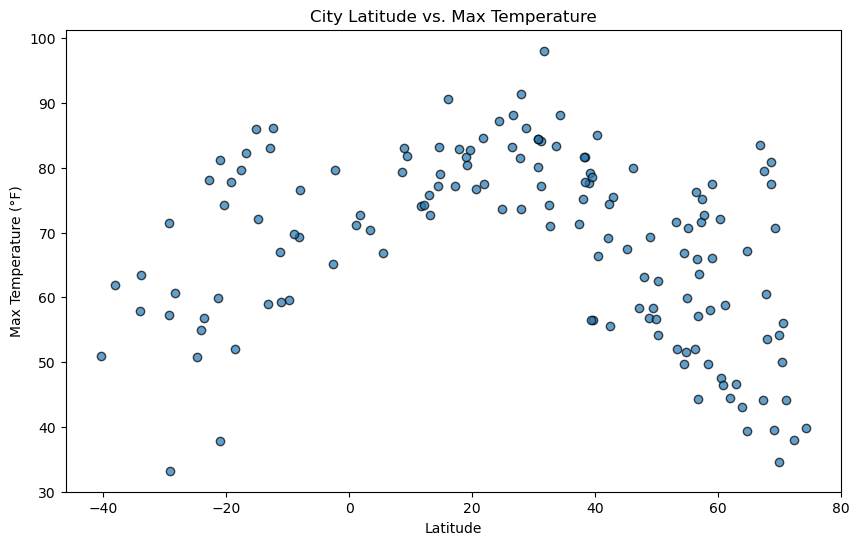

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties

# Set plot title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

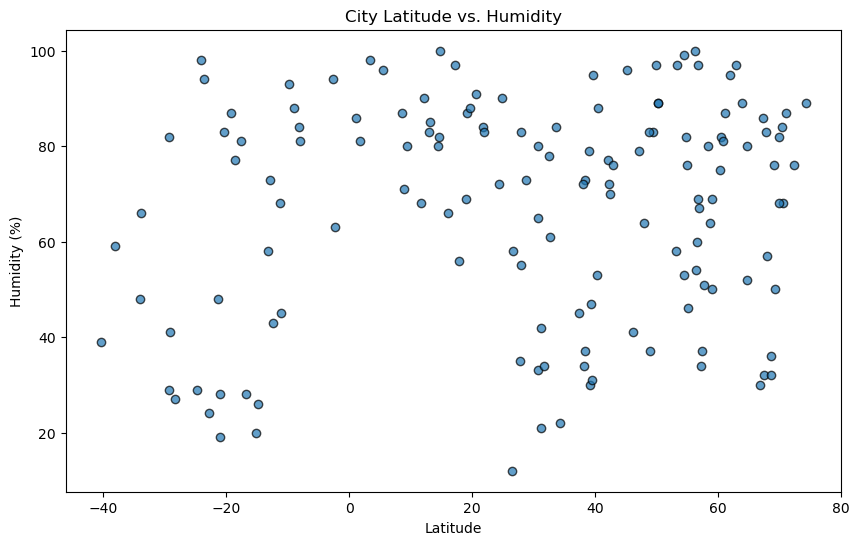

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties

# Set plot title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

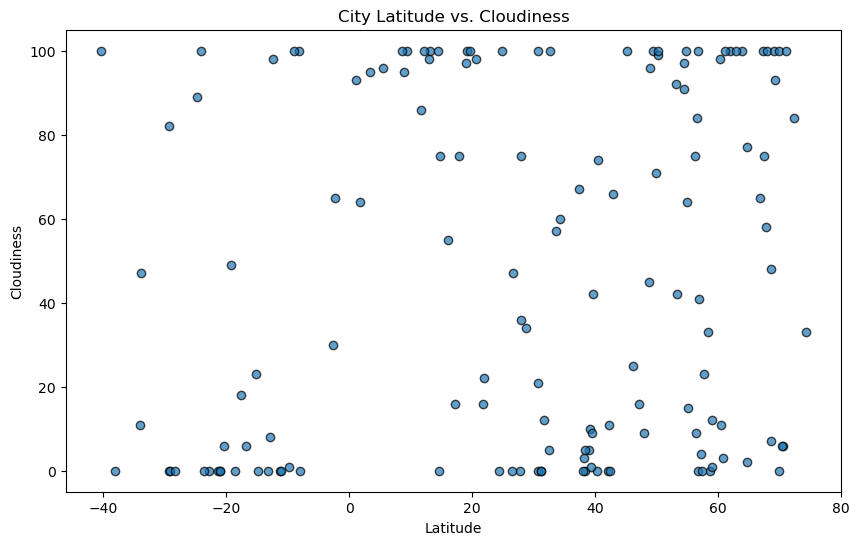

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties

# Set plot title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

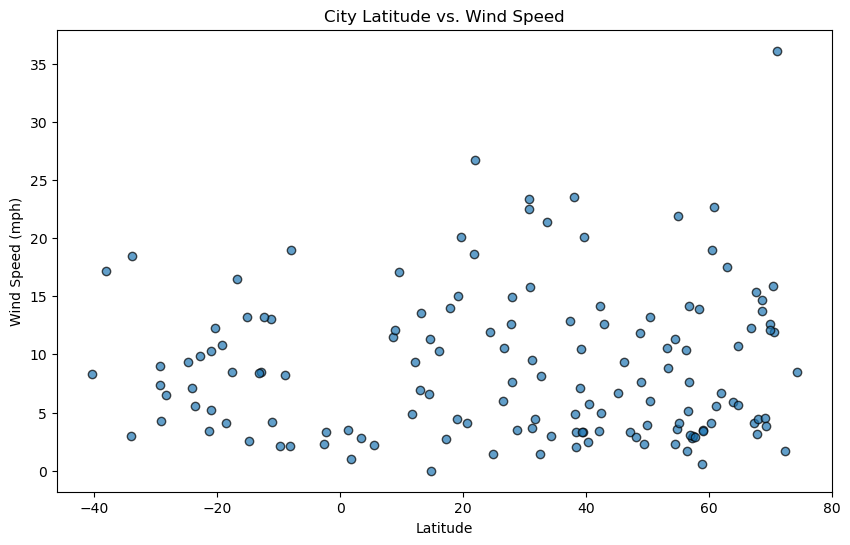

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties

# Set plot title and labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


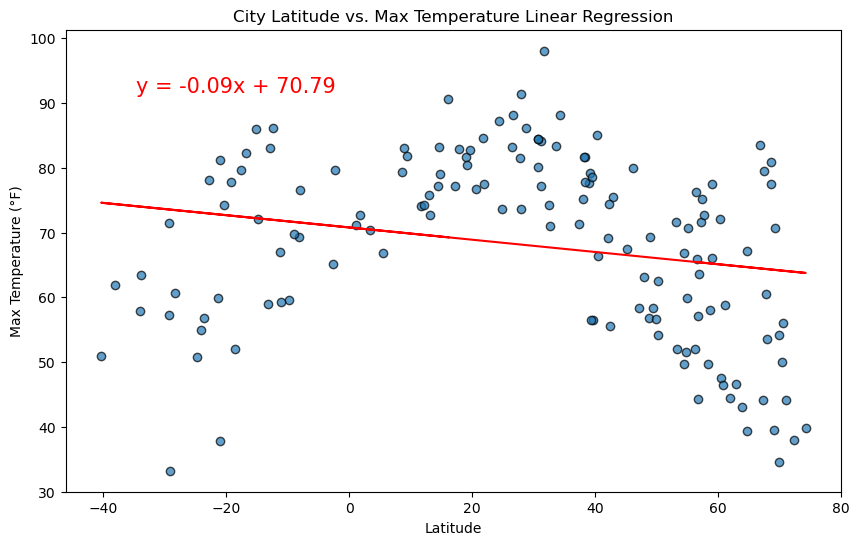

In [12]:
# Define a function to create Linear Regression plots

def create_linear_regression_plot(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.05
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.9
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")

    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
# Call the function with appropriate data
create_linear_regression_plot(city_data_df["Lat"], city_data_df["Max Temp"],
                              "Latitude", "Max Temperature (°F)",
                              "City Latitude vs. Max Temperature Linear Regression",
                              "output_data/lat_vs_temp_regression.png")

# Save the figure
plt.savefig("output_data/Fig5.png")
    
# Show the plot
plt.show()

In [ ]:
# test for success
# Call the function with appropriate data
# create_linear_regression_plot(city_data_df["Lat"], city_data_df["Max Temp"],
#                              "Latitude", "Max Temperature (°F)",
#                              "City Latitude vs. Max Temperature Linear Regression",
#                              "output_data/lat_vs_temp_regression.png")

In [ ]:
# test for success
# city_data_df.head()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
print(northern_hemi_df.head())

                City        Lat         Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                       
0            farasan  16.143979   41.513864     90.59        66          55   
2        east london  24.393108  -79.773524     87.24        72           0   
3          ilulissat  33.719928  139.708524     83.41        84          57   
4        thaba-tseka  27.725835   65.698004     81.46        35           0   
6          grytviken   1.184673   30.352531     71.13        86          93   

         Wind Speed Country        Date  
City_ID                                  
0             10.27      SA  1691550565  
2             11.92      US  1691550568  
3             21.36      JP  1691550569  
4             12.62      PK  1691550569  
6              3.49      UG  1691550571  


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
print(southern_hemi_df.head())

                      City        Lat         Lng  Max Temp  Humidity  \
City_ID                                                                 
1                    moree -29.288637  146.996740     71.47        29   
5                  klyuchi -29.207654   28.316356     33.21        41   
7                    tiksi -28.337562   17.929706     60.71        27   
13       wailua homesteads -24.172320  -48.348971     54.97        98   
21               pulandian  -9.759596   15.399960     59.52        93   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
1                 0        7.34      AU  1691550567  
5                 0        4.29      LS  1691550570  
7                 0        6.53     NaN  1691550572  
13              100        7.09      BR  1691550578  
21                1        2.13      AO  1691550586  


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.40800827878106954


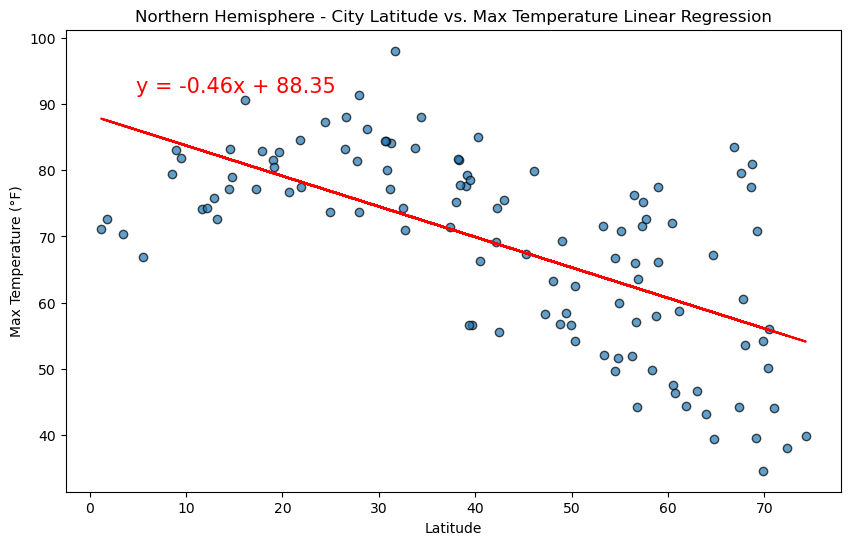

In [15]:
# Linear regression on Northern Hemisphere

# Define the create_linear_regression_plot function
def create_linear_regression_plot_north(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.05
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.9
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Create a DataFrame with Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression on Northern Hemisphere (using Max Temp vs. Latitude)
create_linear_regression_plot_north(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                              "Latitude", "Max Temperature (°F)",
                              "Northern Hemisphere - City Latitude vs. Max Temperature Linear Regression",
                              "output_data/northern_lat_vs_temp_regression.png")


The r-squared is: 0.18895031269801238


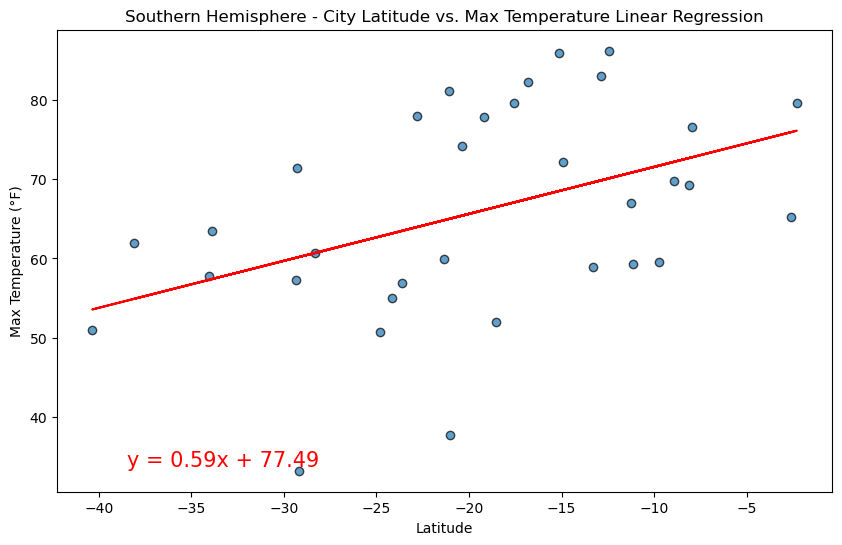

In [16]:
# Linear regression on Southern Hemisphere

# Define the create_linear_regression_plot function
def create_linear_regression_plot_south(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.05
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.01
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Create a DataFrame with Northern Hemisphere data (Latitude <= 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Perform linear regression on Northern Hemisphere (using Max Temp vs. Latitude)
create_linear_regression_plot_south(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                              "Latitude", "Max Temperature (°F)",
                              "Southern Hemisphere - City Latitude vs. Max Temperature Linear Regression",
                              "output_data/northern_lat_vs_temp_regression.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.013900282801551912


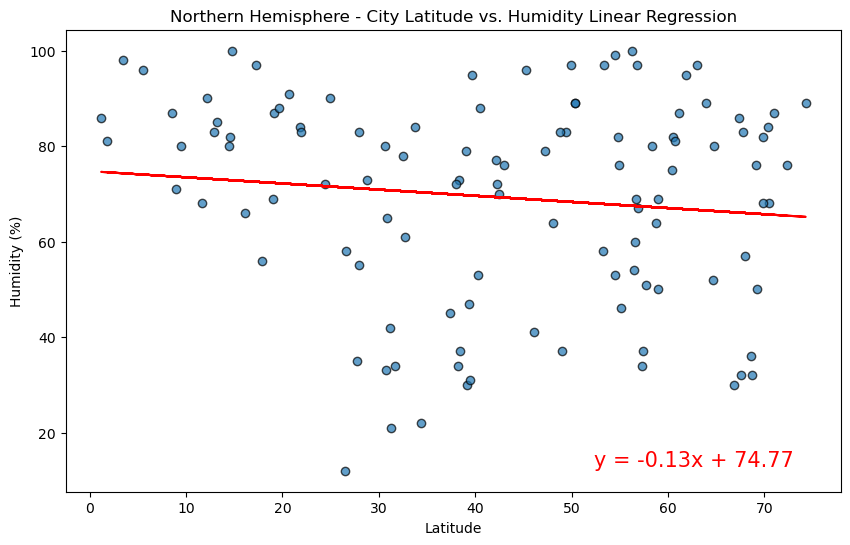

In [17]:
# Northern Hemisphere

# Define the create_linear_regression_plot_north function
def create_linear_regression_plot_north(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.7
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.01
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Perform linear regression on Northern Hemisphere (using Humidity vs. Latitude)
create_linear_regression_plot_north(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                              "Latitude", "Humidity (%)",
                              "Northern Hemisphere - City Latitude vs. Humidity Linear Regression")

The r-squared is: 0.09452285056056549


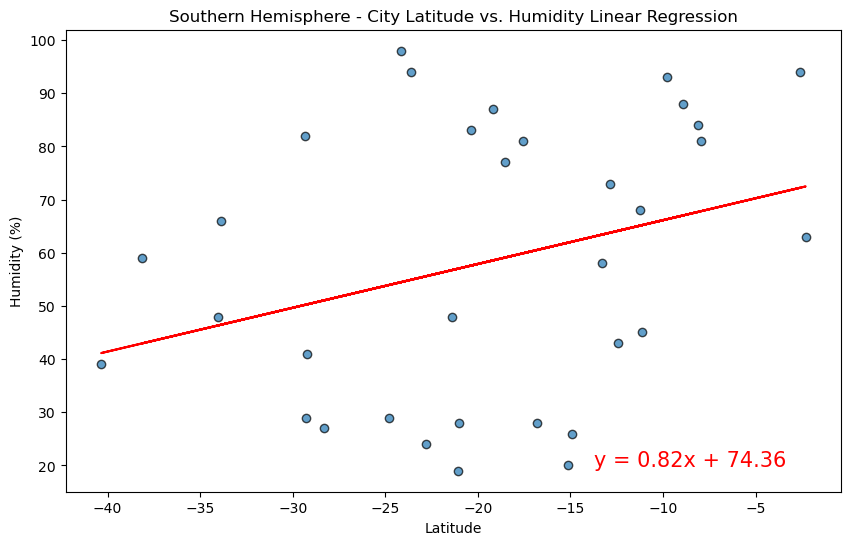

In [18]:
# Southern Hemisphere

# Define the create_linear_regression_plot_south function
def create_linear_regression_plot_south(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.7
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.01
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Perform linear regression on Southern Hemisphere (using Humidity vs. Latitude)
create_linear_regression_plot_south(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                              "Latitude", "Humidity (%)",
                              "Southern Hemisphere - City Latitude vs. Humidity Linear Regression")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.010449522526453802


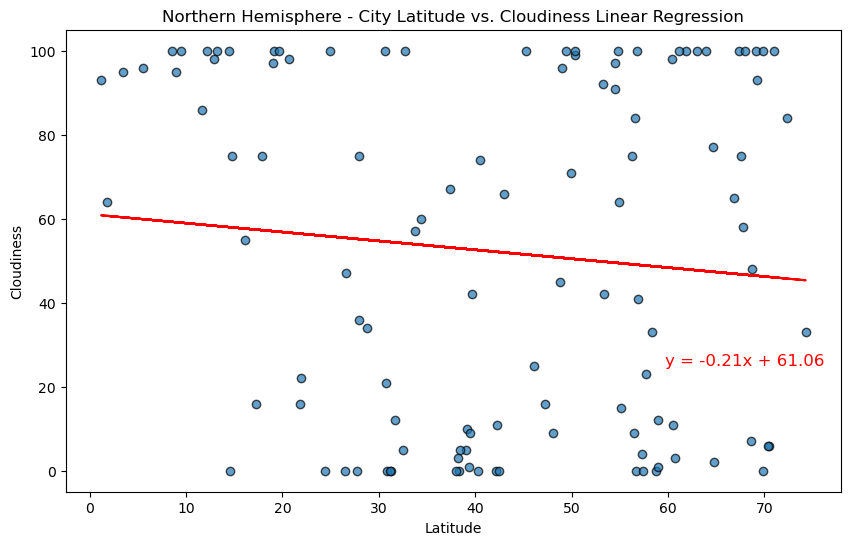

In [19]:
# Northern Hemisphere

# Define the create_linear_regression_plot_north function
def create_linear_regression_plot_north(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.8
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.25
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=12, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Perform linear regression on Northern Hemisphere (using Humidity vs. Latitude)
create_linear_regression_plot_north(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                              "Latitude", "Cloudiness",
                              "Northern Hemisphere - City Latitude vs. Cloudiness Linear Regression")


The r-squared is: 6.813677492798388e-05


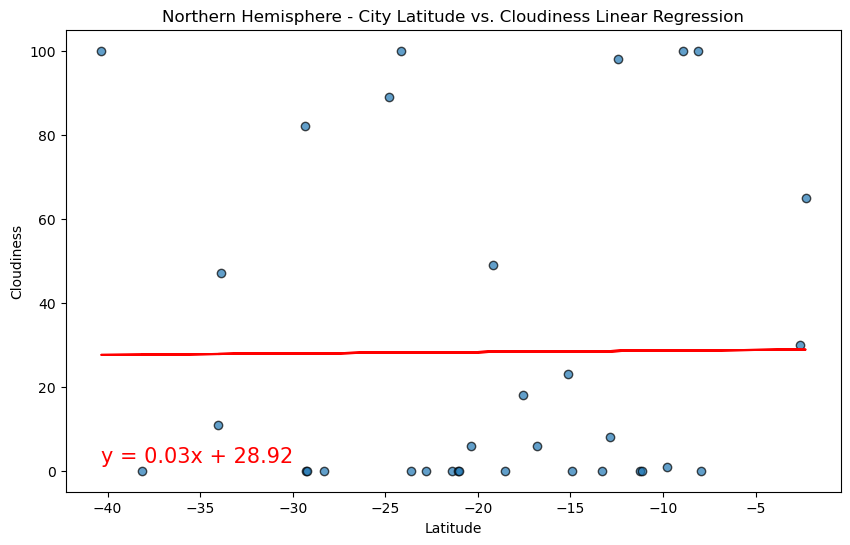

In [20]:
# Southern Hemisphere

# Define the create_linear_regression_plot_south function
def create_linear_regression_plot_south(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.0
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.02
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Perform linear regression on Southern Hemisphere (using Humidity vs. Latitude)
create_linear_regression_plot_south(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                              "Latitude", "Cloudiness",
                              "Northern Hemisphere - City Latitude vs. Cloudiness Linear Regression")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.000372068443554454


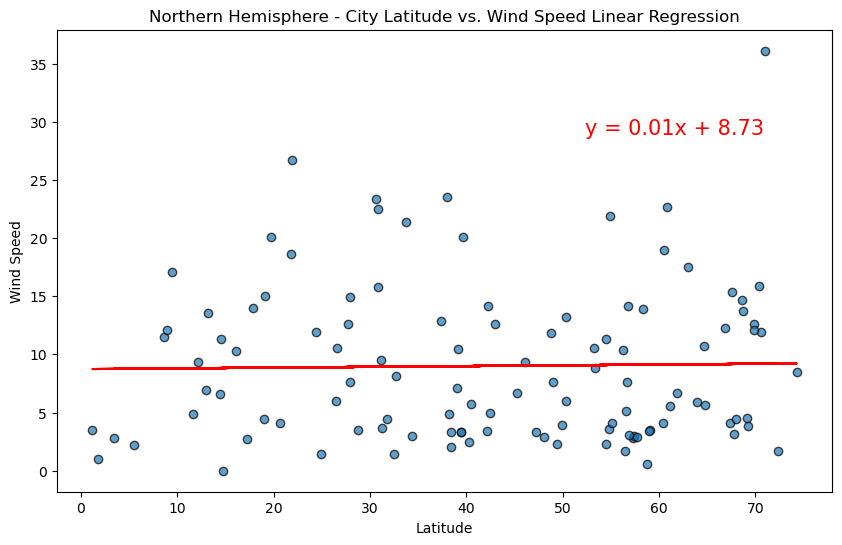

In [21]:
# Northern Hemisphere

# Define the create_linear_regression_plot_north function
def create_linear_regression_plot_north(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.7
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.8
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Perform linear regression on Northern Hemisphere (using Humidity vs. Latitude)
create_linear_regression_plot_north(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                              "Latitude", "Wind Speed",
                              "Northern Hemisphere - City Latitude vs. Wind Speed Linear Regression")


The r-squared is: 0.04053178909214736


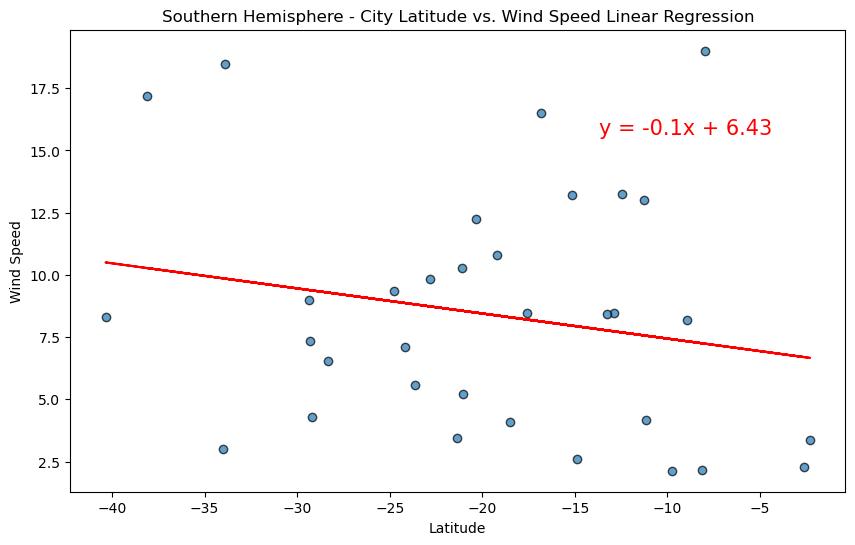

In [22]:
# Southern Hemisphere

# Define the create_linear_regression_plot_north function
def create_linear_regression_plot_south(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.7
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.8
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Perform linear regression on Southern Hemisphere (using Humidity vs. Latitude)
create_linear_regression_plot_south(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                              "Latitude", "Wind Speed",
                              "Southern Hemisphere - City Latitude vs. Wind Speed Linear Regression")

**Discussion about the linear relationship:** YOUR RESPONSE HERE